In [ ]:

from typing import List
import mhn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial
import scipy.cluster
import __init__
import mhn_tools
import RandomMHNGenerator as rmg
import ClusterableMhnGenerator as cmg
from definition import EventDistanceMeasurer as edm



c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading from ../mbonart_checkpoints/rmg1/mhn_SET
loading from ../mbonart_checkpoints/rmg1/mhn_TRAINED


(<matplotlib.image.AxesImage at 0x1a65e57ee70>,
 <matplotlib.colorbar.Colorbar at 0x1a65fa9f7a0>)

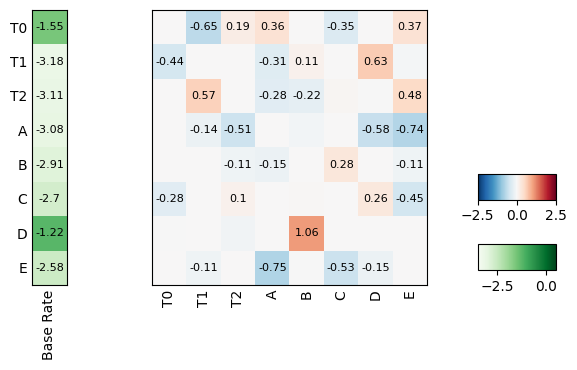

In [2]:
np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(3,5)
rand_generator = rmg.RandomMHNGenerator(cl_generator.getEvents())
rand_generator.loadfrom("../mbonart_checkpoints/rmg1")
cl_generator.setClusterMHN(rand_generator.getMHN())
given_clustersizes=[2,3,4,1,4]
cl_generator.splitClusters(given_clustersizes)
cl_generator.randomizeBaseRates()   #leave out this line for already computed results

test_events = cl_generator.getEvents(cmg.DOM.TEST)
events = cl_generator.getEvents(cmg.DOM.CLUSTER)

sampled_datas:List[pd.DataFrame]=[]

dist_measurers = []
noisy_mhns: List[mhn.model.cMHN]=[]

noise_steps=10
noise_inc=0.1
#noise_inc=0.01      #leave out this line for already computed results

for i in range(noise_steps):
    noisy_mhn = mhn_tools.copyMHN(cl_generator.getMHN())
    sampled_data=noisy_mhn.sample_artificial_data(10000, as_dataframe=True)
    noisy_mhns.append(noisy_mhn)
    sampled_datas.append(sampled_data)
    cl_generator.multNoiseOffDiags(noise_inc)
    #cl_generator.addNoiseOffDiags(noise_inc)

    

#for noisy_mhn in noisy_mhns:
#    noisy_mhn.plot()

rand_generator.getMHN().plot()




In [3]:
for i, sampled_data in enumerate(sampled_datas):
    
    dist_measurer=edm.EventDistanceMeasurerCP(test_events, events)

    dist_measurer.load_data(sampled_data)
    dist_measurer.train_All_MHNs(identifier=f"noise_{i*noise_inc}__", eliminate_zeroes=False)
    #dist_measurer.train_All_MHNs(identifier=f"multnoise{i*noise_inc}__", eliminate_zeroes=False)

    #dist_measurer.train_All_MHNs(identifier=f"multnoise_no-CV_{i*noise_inc}__", do_cv=False, eliminate_zeroes=False)
    #dist_measurer.train_All_MHNs(identifier=f"multnoise_no-CV_elimZeroes_{i*noise_inc}__", do_cv=False, eliminate_zeroes=True)
    dist_measurer.compute_distance_matrix(edm.DIST.OFFDIAG_L1_SYM)

    dist_measurers.append(dist_measurer)

Directory for storage is edm_noise_0.0__9691bedb199c1/T0_T1_T2
check if mbonart_checkpoints/edm_noise_0.0__9691bedb199c1/T0_T1_T2   does exist


TypeError: EventDistanceMeasurer.train_All_MHNs() got an unexpected keyword argument 'eliminate_zeroes'

Noise 0.0:


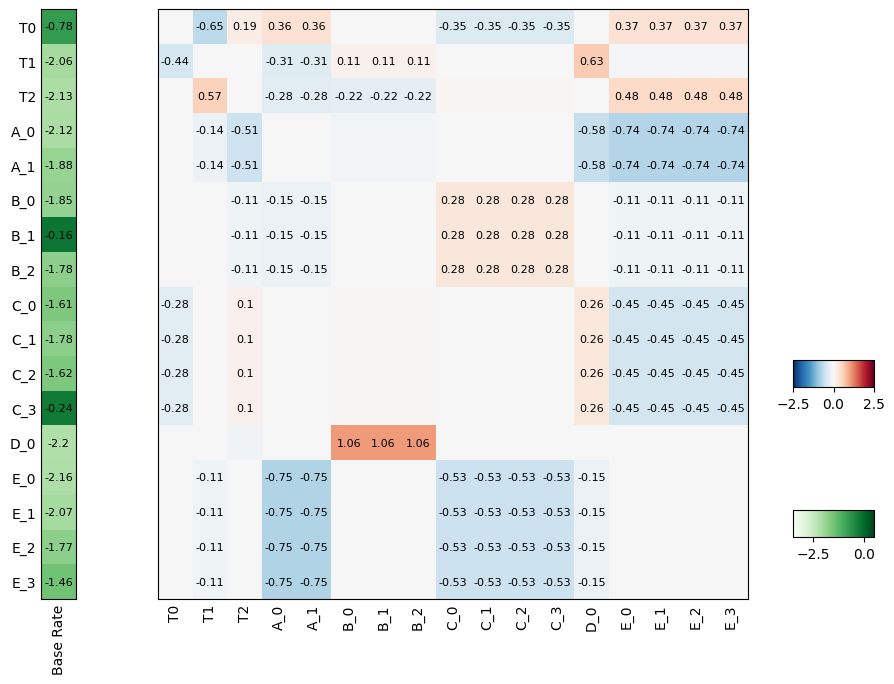

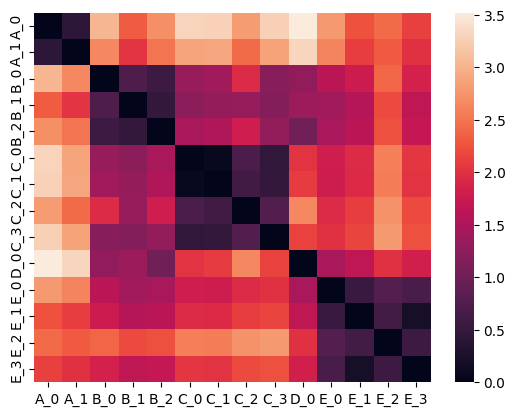

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


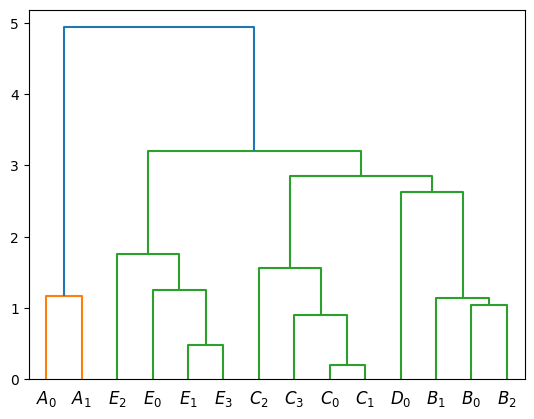

[0 0 1 1 1 2 2 2 2 3 4 4 4 4]
Noise 0.1:


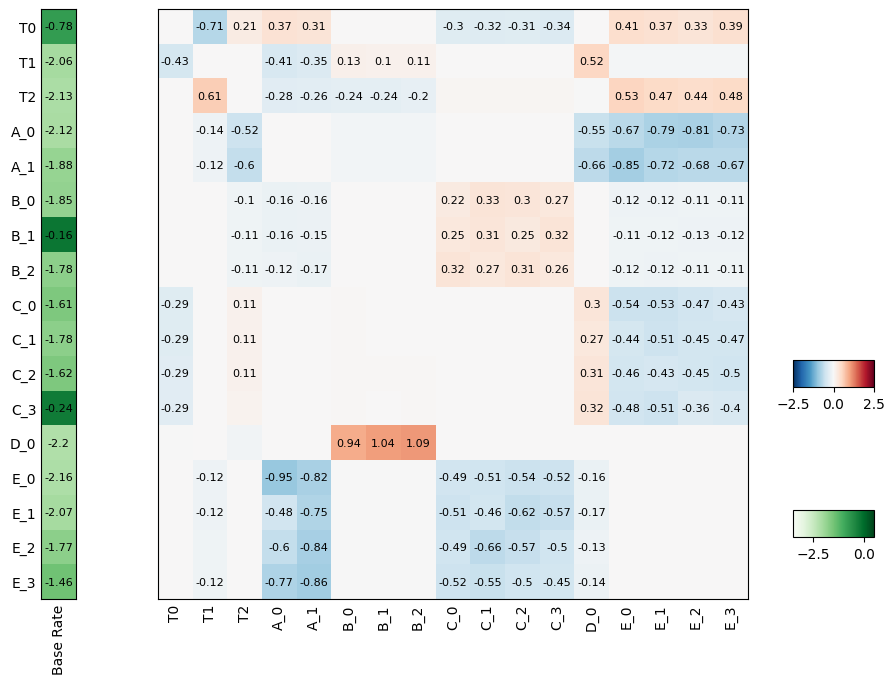

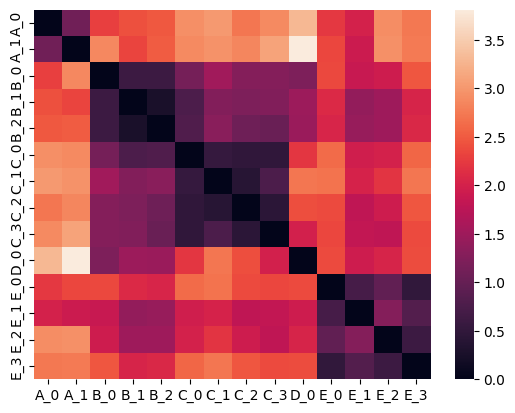

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


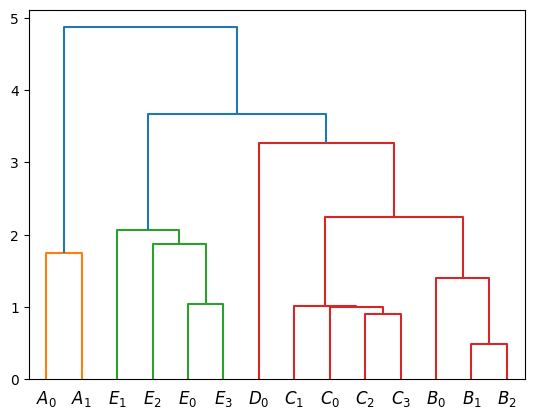

[0 0 1 1 1 2 2 2 2 3 4 4 4 4]
Noise 0.2:


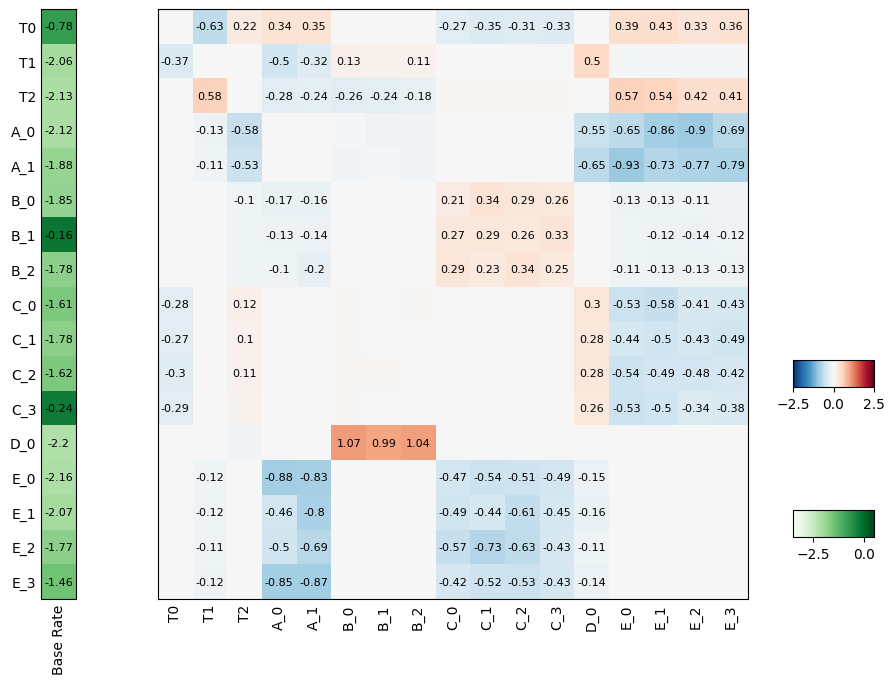

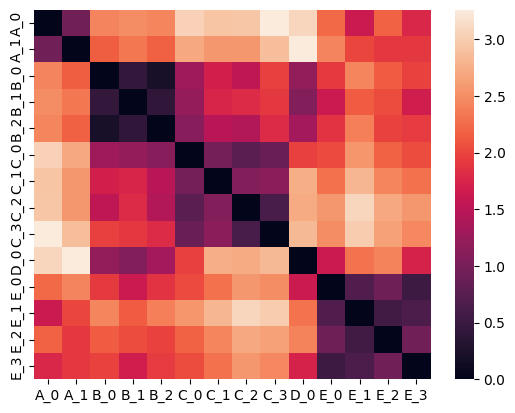

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


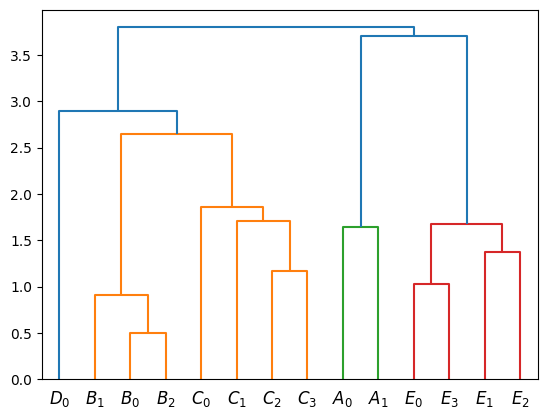

[0 0 1 1 1 2 2 2 2 3 4 4 4 4]
Noise 0.30000000000000004:


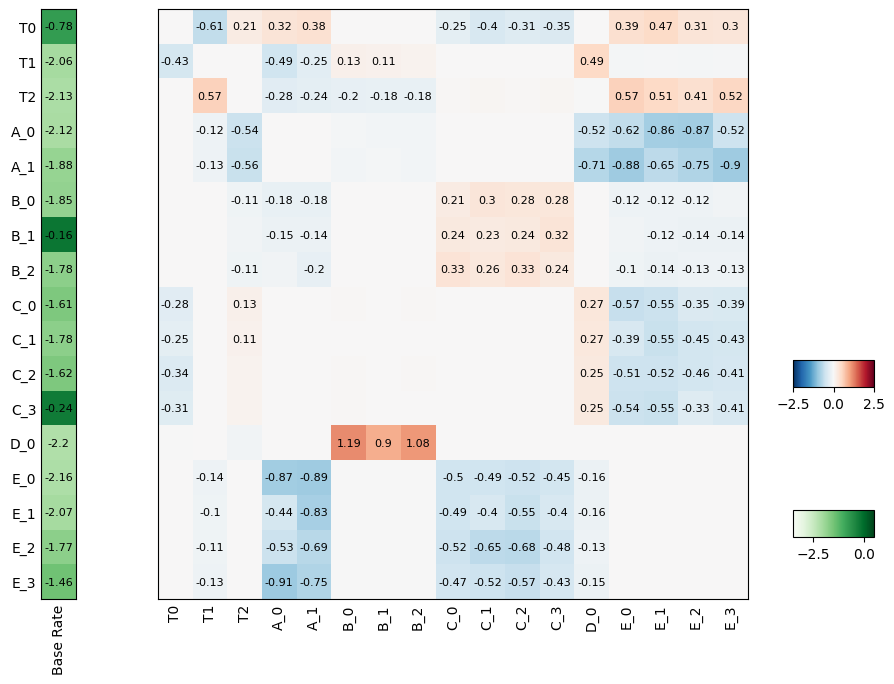

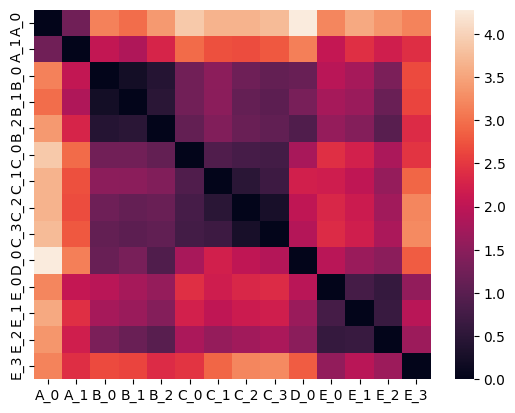

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


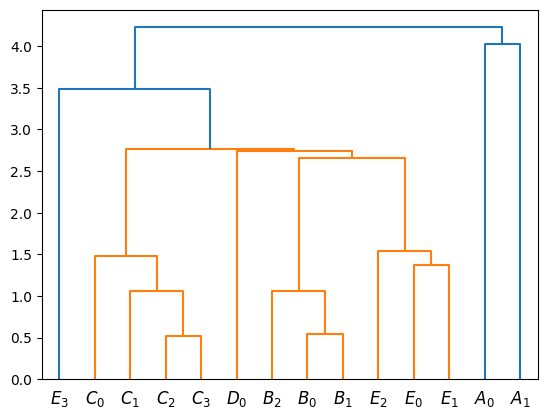

[0 1 2 2 2 3 3 3 3 2 2 2 2 4]
Noise 0.4:


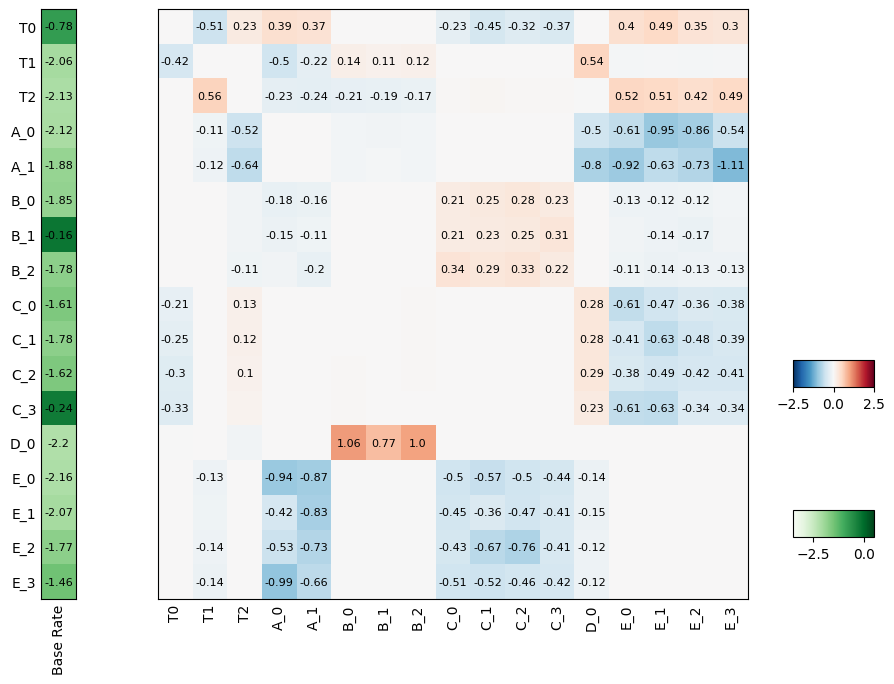

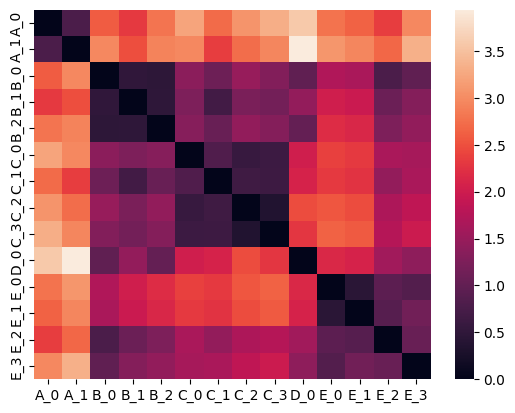

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


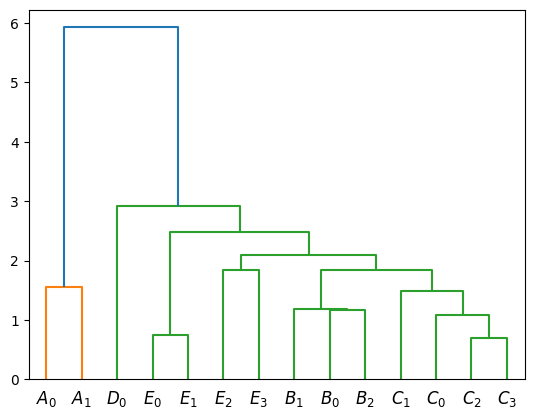

[0 0 1 1 1 1 1 1 1 2 3 3 4 4]
Noise 0.5:


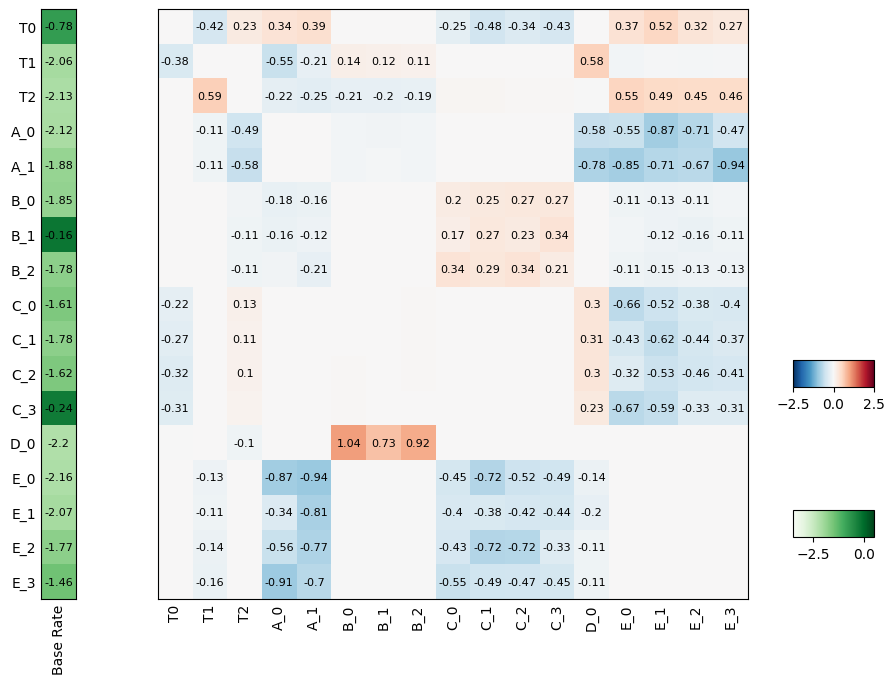

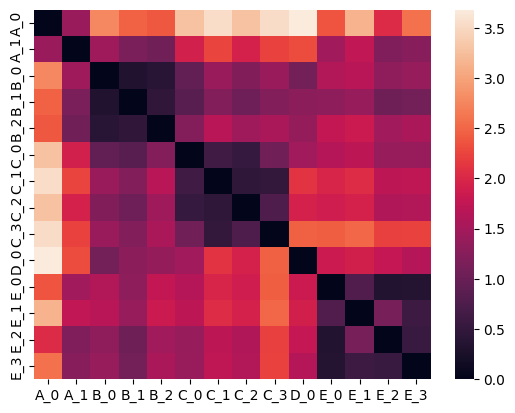

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


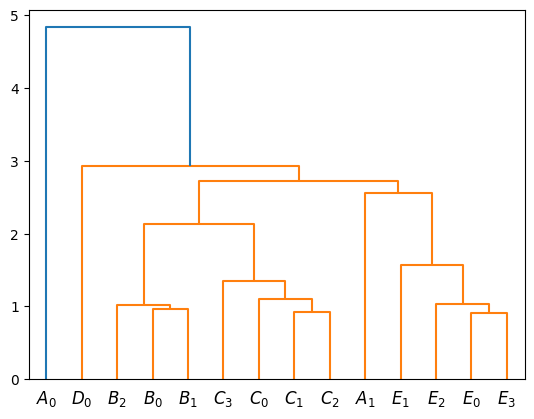

[0 1 2 2 2 2 2 2 2 3 4 4 4 4]
Noise 0.6000000000000001:


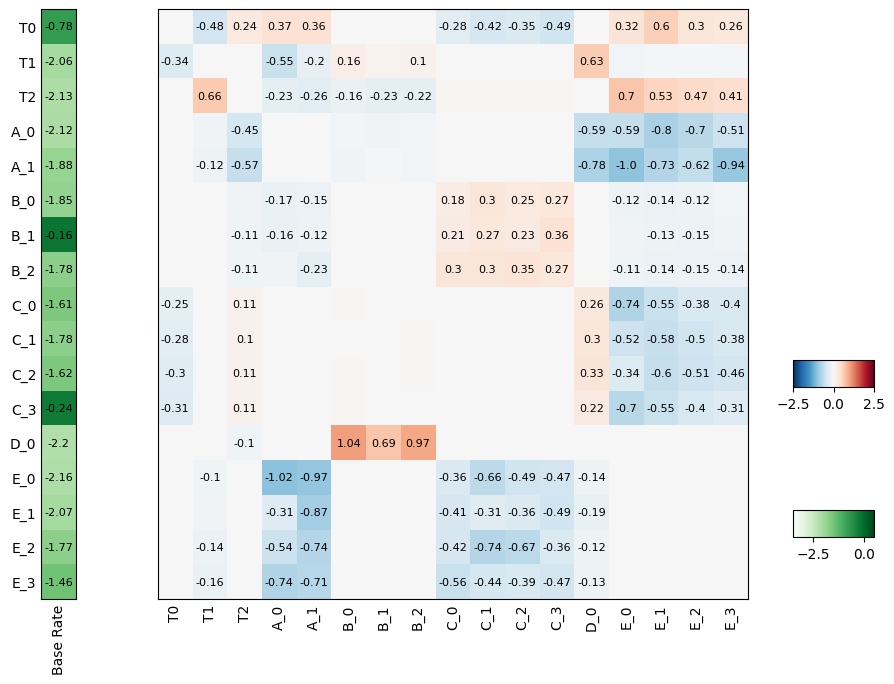

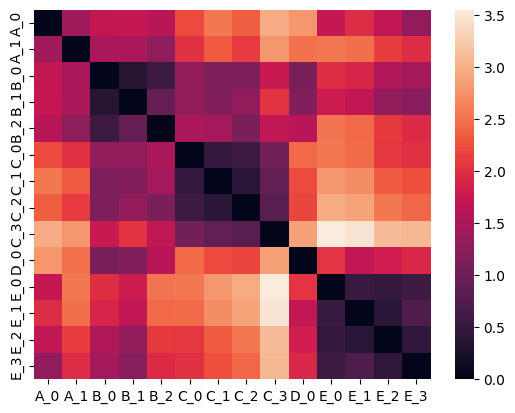

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


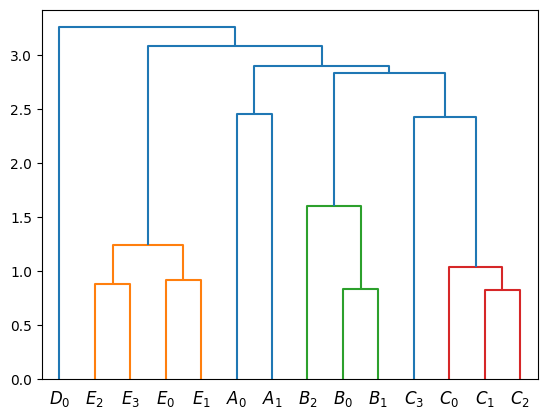

[0 0 1 1 1 2 2 2 2 3 4 4 4 4]
Noise 0.7000000000000001:


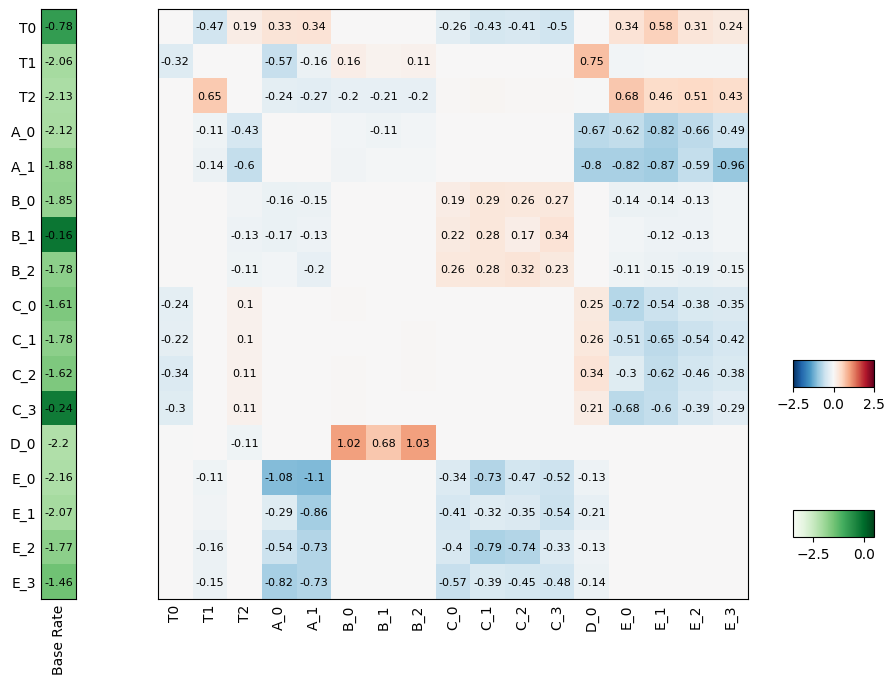

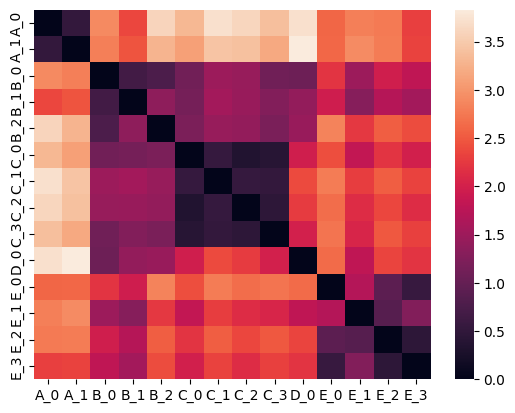

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


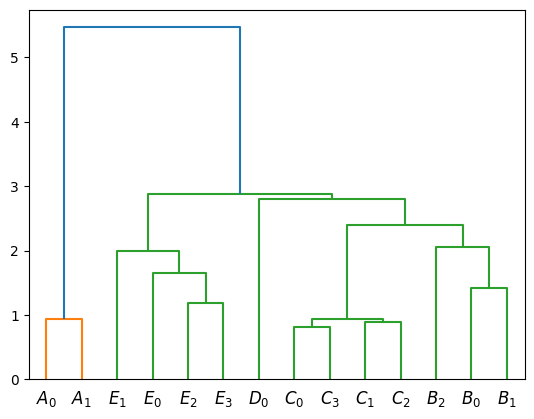

[0 0 1 1 1 2 2 2 2 3 4 4 4 4]
Noise 0.8:


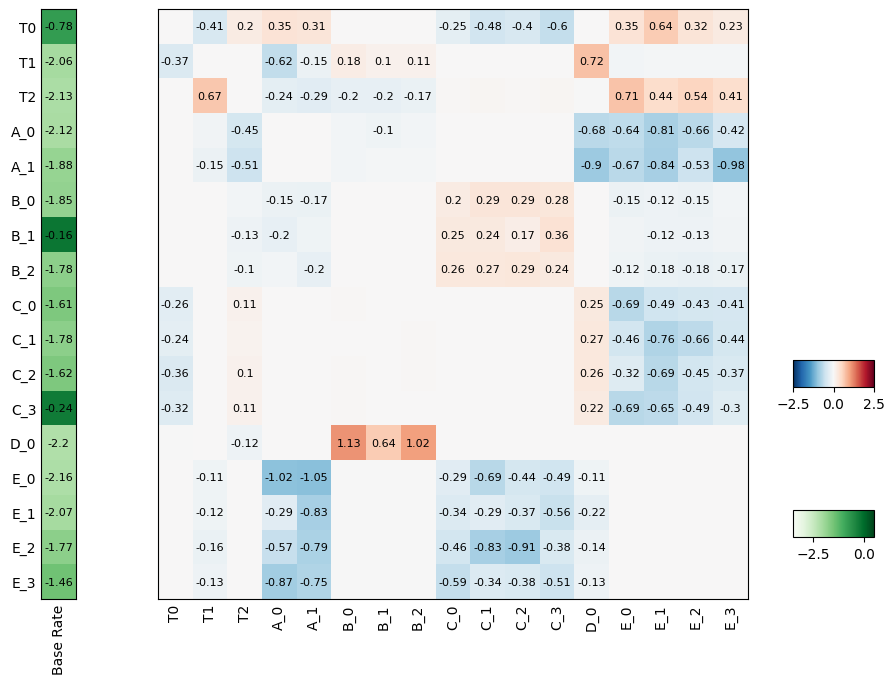

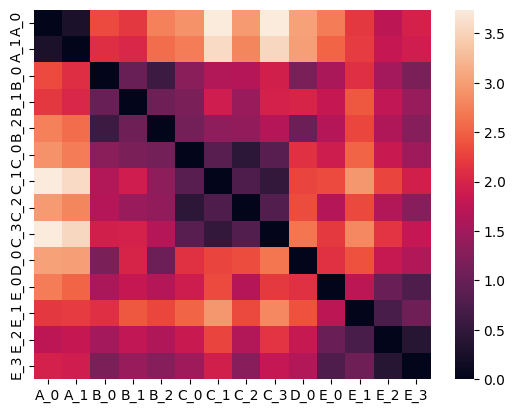

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


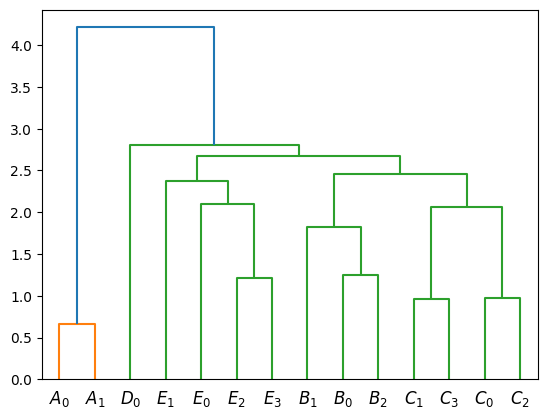

[0 0 1 1 1 2 2 2 2 3 4 4 4 4]
Noise 0.9:


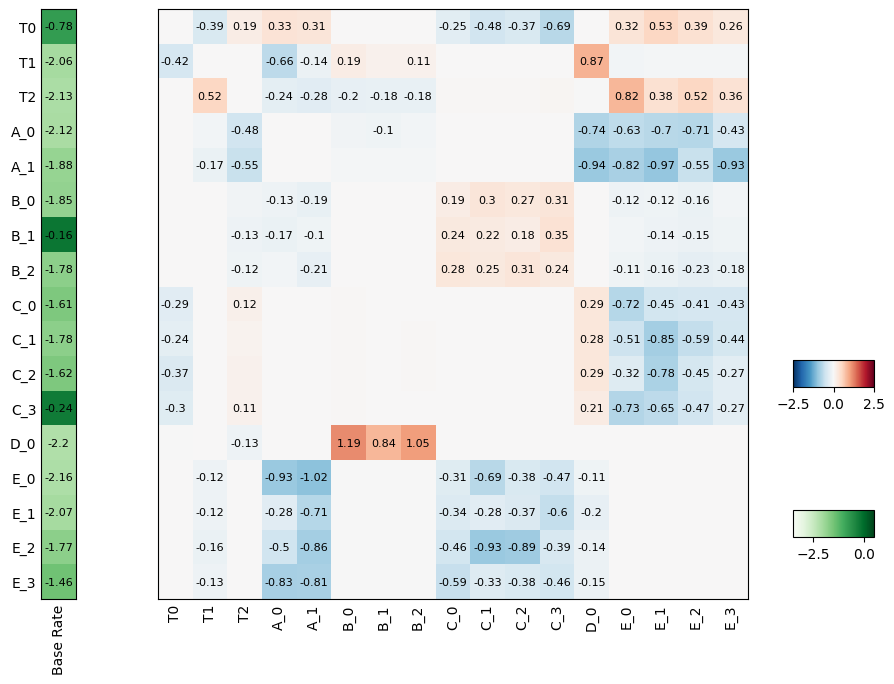

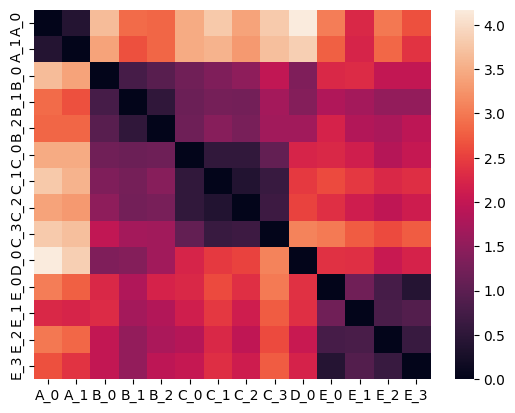

C:\Users\michi\AppData\Local\Temp\ipykernel_32964\2653763972.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")


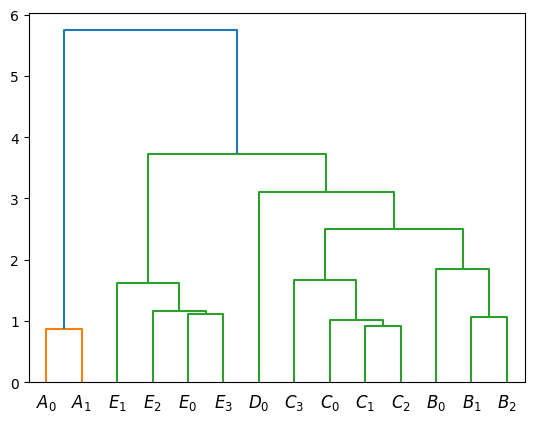

[0 0 1 1 1 2 2 2 2 3 4 4 4 4]


In [ ]:
#look at clusters

linkages=[]
cut_trees=[]

for i,dist_measurer in enumerate(dist_measurers):
    print(f"Noise {i*noise_inc}:")
    noisy_mhns[i].plot()
    plt.show()
    sns.heatmap(dist_measurer._dist_mat)
    plt.show()
    linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="single")
    cut_tree = np.concatenate(scipy.cluster.hierarchy.cut_tree(linkage, n_clusters=5))
    scipy.cluster.hierarchy.dendrogram(linkage, labels= [f"${ev}$" for ev in dist_measurer._events])
    linkages.append(linkage)
    cut_trees.append(cut_tree)
    plt.show()
    print(cut_tree)

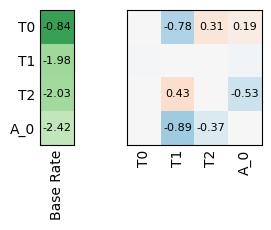

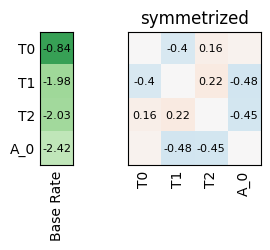

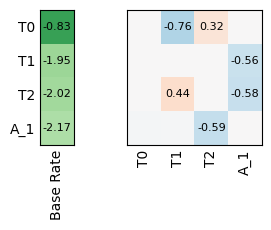

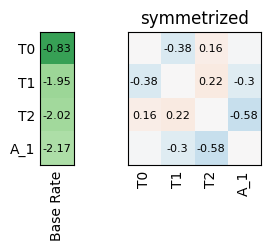

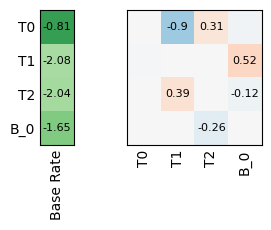

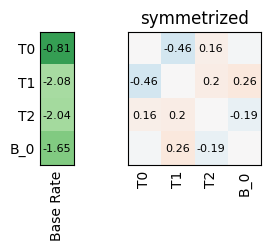

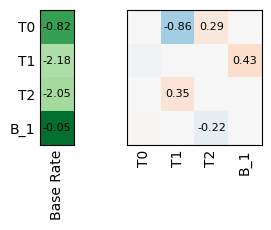

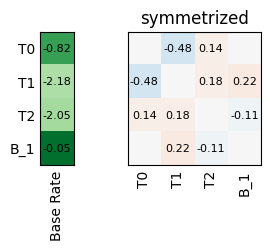

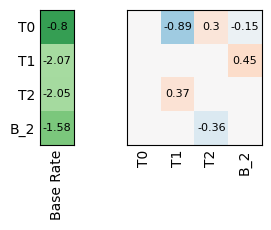

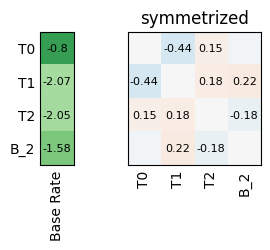

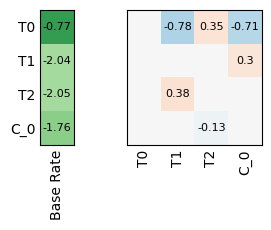

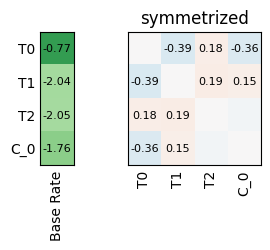

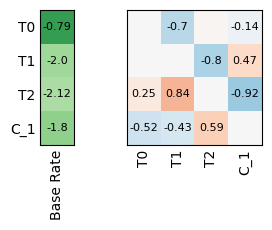

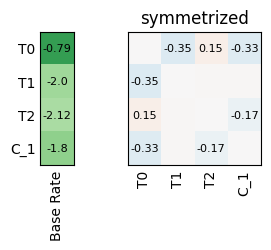

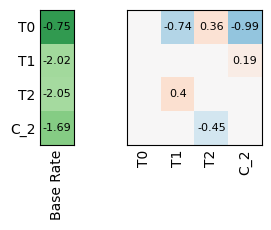

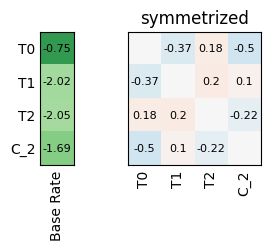

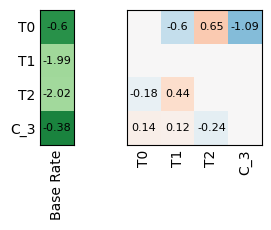

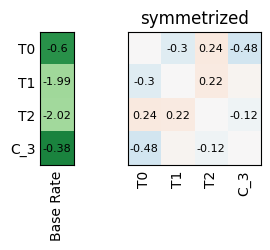

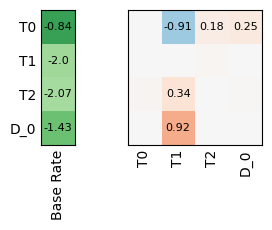

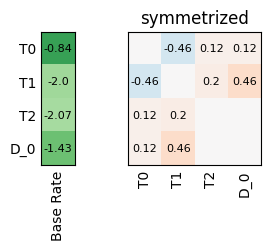

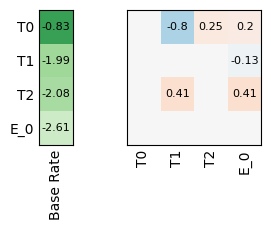

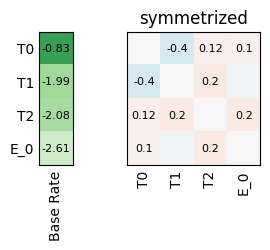

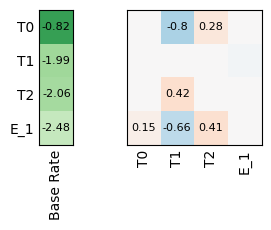

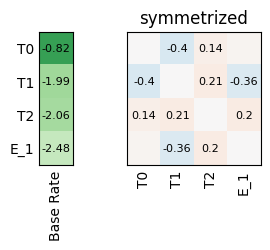

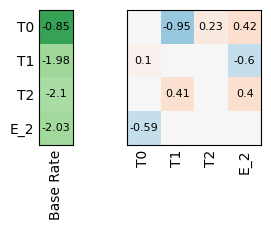

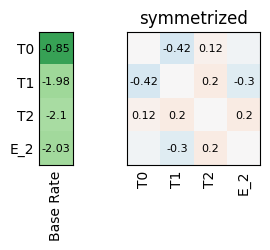

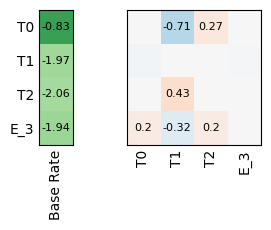

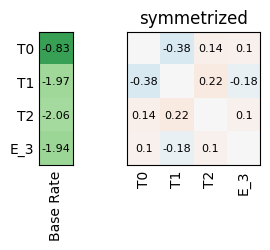

In [ ]:
for ev in dist_measurers[0]._events:
    plot_mhn=dist_measurers[2]._mhns[ev]
    plot_mhn.plot(colorbar=False)
    plt.show()
    plot_mhn.log_theta = (plot_mhn.log_theta + np.transpose(plot_mhn.log_theta))/2
    plot_mhn.plot(colorbar=False)
    plt.title("symmetrized")
    plt.show()


Compare the computed clusters (number of clusters was given in this case) to the ground truth splitting

[0 0 1 1 1 2 2 2 2 3 4 4 4 4]


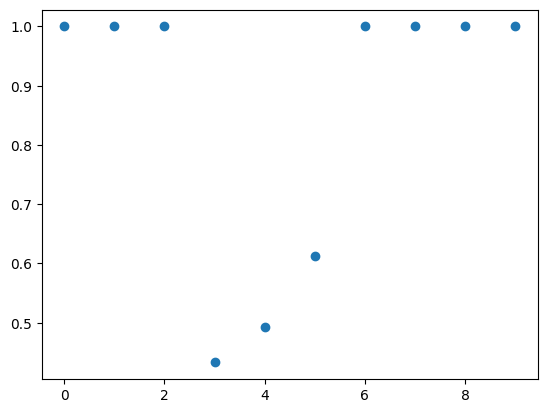

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

cluster_solution=np.concatenate([[i]*c_size for i, c_size in enumerate(given_clustersizes)])
print(cluster_solution)

ar_scores=[]

for cut_tree in cut_trees:
    ar_scores.append(adjusted_rand_score(cluster_solution,cut_tree))

plt.scatter(range(10), ar_scores)
